In [275]:
#Find the optimal weights for the two dimensional dataset to seperate mice from rats based on data about height and weight. 
#This is a superviced dataset with labels that can be found in the data folder (in this repo)


In [276]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from itertools import cycle
    
    
rodent_data = pd.read_csv('rodents.csv', sep = ';')
rodent_data.head()

,weight,height,type
0,233.479920,23.514130,rat
1,231.324467,26.033830,rat
2,17.906954,6.846577,mouse
3,230.276523,24.077800,rat
4,20.360593,6.605983,mouse


[-5.  -2.5  0.   2.5  5. ]


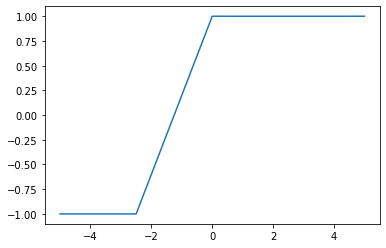

In [277]:
#Part one: general

#1. Look at the activation_function and plot the y-values for each x from -5,5 spaced with 0.5


def activation_function(x):
    """
    Step function to respond with y = 1 or -1
    Parameter:
    x: An x (numeric) value that will have a corresponding y value of 1 or -1
    """
    if x < 0:
        return -1
    else:
        return 1
    
rnge = np.linspace(-5, 5, num=5)
print(rnge[0:5])
values = [activation_function(i) for i in rnge]
plt.plot(rnge, values)

In [278]:
#2. Change the perceptron method from the notebook to use the numpy.dot() method in line 12 instead of the lengthy sum() function


def perceptron(inp, weights):
    """
    Given a list of input (x) values and a list of weights, 
    calculates the dot product of the 2 lists and returns 1 or -1 (fire or don't)
    Parameters:
    inp: vector of input predictors
    weights: vector of weights to be ajusted for precise prediction of output.
    """
    dot_product = np.dot(inp, weights)
    output = activation_function(dot_product)
    return output

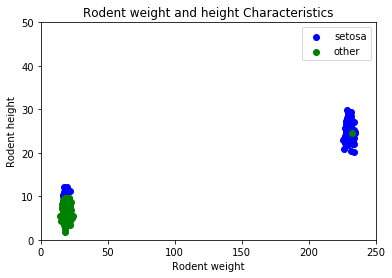

In [279]:
#Part two: rodent data

#1. Make a new scatter plot with datapoints of weights vs heights. Choose different colors for rats and mice


def plot_manual(rodent_data, w_line=None):
    rodent_weight = rodent_data[rodent_data['type'] == 'rat']['weight']
    rodent_height = rodent_data[rodent_data['type'] == 'rat']['height']
    plt.scatter(rodent_weight, rodent_height, c='b', label='setosa')

    rodent_weight = rodent_data[rodent_data['type'] != 'rat']['weight']
    rodent_height = rodent_data[rodent_data['type'] != 'rat']['height']
    plt.scatter(rodent_weight, rodent_height, c='g', label='other')

    plt.title('Rodent weight and height Characteristics')
    plt.xlabel('Rodent weight')
    plt.ylabel('Rodent height')
    
    if w_line:                  
        l = np.linspace(0, 300) 
        m, b = w_line
        plt.plot(l, m * l + b, 'y-', lw=2)
        print('Slope:',m)
        print('Intercept:',b)
    
    plt.axis([0, 250, 0, 50])
    plt.legend()
    plt.show()

plot_manual(rodent_data)

Slope: 0.044
Intercept: 9


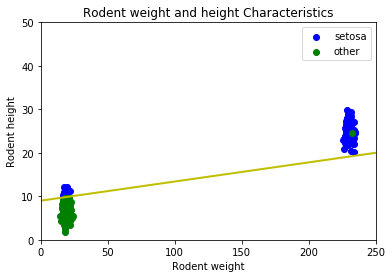

In [280]:
#M2. Manually find the optimal linear function to divide the 2 groups (y = aX+b). Plot it on the scatter plot

#3. What is the slope and intercept of the linear function?

plot_manual(rodent_data,(0.044,9))

In [281]:
#5. Clean up any rows with null data

rodent_data = rodent_data.dropna()

In [282]:
#4. Now change the 'type' column to represent rats as 1 and mice as -1


class_labels = np.copy(rodent_data['type'])
class_labels[class_labels != 'rat'] = -1
class_labels[class_labels == 'rat'] = 1

ro_data = rodent_data.drop(['type'],axis='columns')
ro_data = ro_data.to_numpy()

trainings_data = [(d[:2], l) for d, l in zip(ro_data, class_labels)]
print(trainings_data[:10])

[(array([233.47992042,  23.51412993]), 1), (array([231.32446732,  26.03382998]), 1), (array([17.90695406,  6.84657676]), -1), (array([230.27652283,  24.07779977]), 1), (array([20.36059266,  6.60598293]), -1), (array([21.60538752,  6.81246003]), -1), (array([17.8572872, 11.0354045]), 1), (array([22.12646643,  3.42641199]), -1), (array([16.70594556, 10.22468149]), 1), (array([17.8298957 ,  1.76093337]), -1)]


In [283]:
#6. Use these weights herè [40,-190] to determine if the following 3 animals are mice or rats:
animals = [[231.32446731816555,26.03382997978225],
           [17.906954059999567,6.846576762459397],
           [230.276522831171,24.077799766119398]]

weights = [40,-190]


def predict(inp_vec, weights):
    """
    Parameters:
    inp_vec:
        An input vector consisting of rodent weight and height
    weights:
        A vector of same length as inp_vec, containing a weight for each input
    return:
        A class label, either 1 for 'rat' or -1 for 'other'
    """
    class_label_prediction = perceptron(inp_vec, weights)
    return class_label_prediction


for a in animals:
    print(predict(a, weights))

1
-1
1


[(array([233.47992042,  23.51412993]), 1), (array([231.32446732,  26.03382998]), 1), (array([17.90695406,  6.84657676]), -1), (array([230.27652283,  24.07779977]), 1), (array([20.36059266,  6.60598293]), -1), (array([21.60538752,  6.81246003]), -1), (array([17.8572872, 11.0354045]), 1), (array([22.12646643,  3.42641199]), -1), (array([16.70594556, 10.22468149]), 1), (array([17.8298957 ,  1.76093337]), -1), (array([229.88250532,  24.29466665]), 1), (array([17.73055577,  9.5570562 ]), -1), (array([20.48251289,  8.38047949]), -1), (array([226.24154554,  20.87541089]), 1), (array([18.08058309,  9.23417588]), -1), (array([228.29767459,  25.27948108]), 1), (array([18.13942449,  2.50423496]), -1), (array([232.06664231,  27.2185965 ]), 1), (array([20.63372736,  6.48930256]), -1), (array([23.59044761,  5.4986944 ]), -1), (array([227.51961289,  26.05189086]), 1), (array([21.95475903,  6.46778263]), -1), (array([22.0837118 , 11.22308929]), 1), (array([229.68526619,  24.93237326]), 1), (array([229

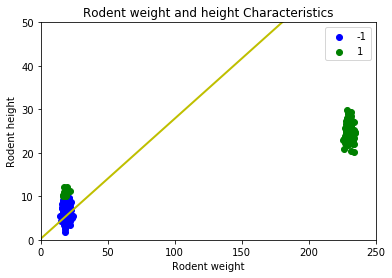

In [284]:
#7. Find the (approximately) optimal weights using the perceptron learning algorithm
#8. Plot the weightline
#9. Plot the division line

def plot_data(data, w_line=None, learned_weights=None):
    """
    show data in 2d petal length vs width and target being 1 or -1 (indicating if flower is iris setosa or not.)
    Parameters:
    data: array of type tuple(array[petal_height, petal_width], target) target is either 1 or -1
    w_line: a visual line to seperate the 2 clusters. If none is provided it will not show
    """
    data_points, class_labels = list(zip(*data))
    data_points = np.array(data_points)
    class_labels = np.array(class_labels)

    colors = cycle('bgrcmy')
    for l, col in zip(np.unique(class_labels), colors):
        d =  data_points[class_labels == l]
        x = d[:,0]
        y = d[:,1]
        plt.scatter(d[:,0], d[:,1], c=col, label=l)
    
    if w_line:                  # only plot a division line if one exists
        l = np.linspace(0, 3000) # 50 evenly spaced numbers for the x axis
        m, b = w_line           # m = slope, b = intercept
        plt.plot(l, m * l + b, 'y-', lw=2) # lw is line width
        plt.plot([0,learned_weights[0]],[0,learned_weights[1]],lw=2)

    plt.axis([0, 250, 0, 50])
    plt.title('Rodent weight and height Characteristics')
    plt.xlabel('Rodent weight')
    plt.ylabel('Rodent height')
    plt.legend()


def pla(training_data, no_iterations=10000, eta=0.5):
    """
    Find the proper weights to use in the perceptron based on data and target
    Parameters:
    training_data: list of vectors, as predictors zipped with a target value
    no_iterations: number of times to adjust the weights to get them as close as possible to the optimal number
    eta: the learning rate (prevent learning to go pendulum from one extreme error to the opposite)
    """
    
    dim = len(training_data[0][0]) # len = 2 (petal width and height)
    weights =  np.random.random(dim) # error and weights (for x and y) start out as random numbers
    
    # initial_error
    error = np.random.random()
    weight_history = [np.copy(weights)]
    print(training_data)
    for i in range(no_iterations):
        #pdb.set_trace()
        #breakpoint()
        inp_vec, expected_label = training_data[i % len(training_data)] # expected labels are 1 or -1
        perceptron_output = perceptron(inp_vec, weights) # perceptron output id a decimal between 0 and 1
        error = expected_label - perceptron_output       # error 
        weights += eta * error * inp_vec # accumulate the weights
        weight_history.append(np.copy(weights))
        
    return weights, weight_history 


def compute_line(weights):
    """
    Visualizing Linear Separability by using weights/norm(weights) wich are othogonal to the division line.
    Parameters:
    weights: the weights calculated by PLA
    """
    norm = np.linalg.norm(weights) # calculating the frobenius norm (or L2 norm) of the learned weights (The norm is the total magnitude of all vectors in the space)
    ww = weights / norm # weight vector is perpendicular (or othogonal) to the division line
    ww1 = [ww[1], -ww[0]] # first point on our division line
    ww2 = [-ww[1] , ww[0]] # second point on our division line
    # slope and intercept
    m = (ww2[1] - ww1[1]) / (ww2[0] - ww1[0]) # slope = delta y / delta x
    b = ((ww2[0] - ww1[0]) * m) + ww1[1]      # intercept = delta x * slope + y(x1)
    print('Slope:',m)
    print('Intercept:',b)
    return m, b



learned_weights, weight_history = pla(trainings_data)
print(learned_weights)
plot_data(trainings_data, compute_line(learned_weights), learned_weights)

[ 1.50405138 51.1852506 ]
Slope: -0.029384468366156997
Intercept: 0.029371790610242175


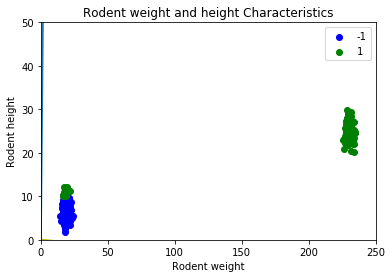

In [285]:

def predict_with_bias(inp, weights):
    """
    Given a list of input (x) values and a list of weights, 
    calculates the dot product of the 2 lists and returns 1 or -1 (fire or don't)
    Parameters:
    inp: vector of input predictors
    weights: vector of weights to be ajusted for precise prediction of output. If weights contains an additional value, this must be the bias
    """
    if len(weights)>len(inp):
        bias,weights = weights[-1],weights[:-1]
        sum_bias = np.dot(weights,inp)+bias
        return activation_function(sum_bias)
    # This is the same as the dot product np.dot(i, w)
    dot_product = sum([i * w for i, w in zip(inp, weights)])
    output = activation_function(dot_product)
    return output

def pla(training_data, no_iterations=50000, w_bias=False, eta=0.5):
    """
    Find the proper weights to use in the perceptron based on data and target
    
    Parameters:
    training_data: list of vectors, as predictors zipped with a target value
    no_iterations: number of times to adjust the weights to get them as close as possible to the optimal number
    eta: the learning rate (prevent learning to go pendulum from one extreme error to the opposite)
    w_bias: boolean to indicate whether to use a bias weight together with the input weights
    """
    error = np.random.random()
    dim = len(training_data[0][0])
    weights = np.random.random(dim)
    weight_history = [np.copy(weights)]

    if w_bias:
        weights = np.random.random(dim + 1) # an extra bias weight is added to the list of weights
        data = np.array(list(zip(*training_data))[0]) # extract the data from the targets
        
        biases = np.ones((data.shape[0], 1)) # matrix of 150 rows by 1 column of values = 1
        training_data_w_bias = np.append(data, biases, axis=1) # append the biases to the data creating extra column
        training_data = list(zip(training_data_w_bias, list(zip(*training_data))[1])) # adding the target column
    
    for i in range(no_iterations):
        inp_vec, expected_label = training_data[i % len(training_data)]
        perceptron_output = perceptron(inp_vec, weights)
        error = expected_label - perceptron_output

        weights += eta * error * inp_vec
        weight_history.append(np.copy(weights))

    return weights, np.array(weight_history)


learned_weights, weight_history = pla(trainings_data, w_bias=True)
learned_weights = learned_weights[:2]
print(learned_weights)


plot_data(trainings_data, compute_line(learned_weights), learned_weights)
